In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
tf.config.set_visible_devices([], 'GPU')

In [6]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [7]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


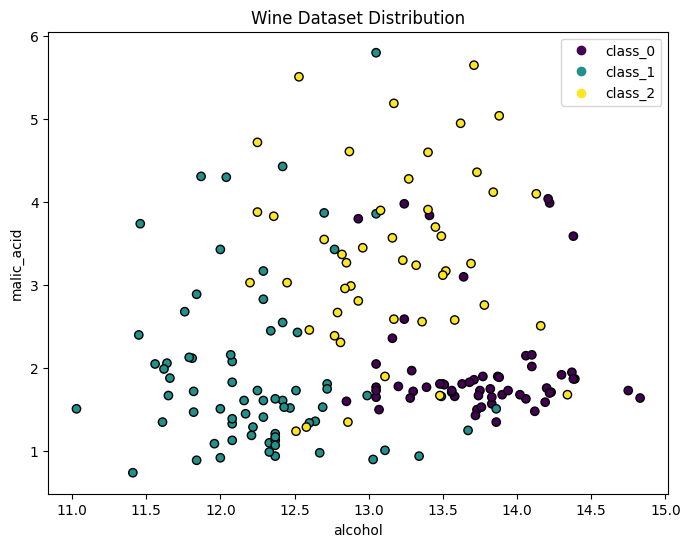

In [8]:
# Plot the data distribution (using the first two features for visualization)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('Wine Dataset Distribution')
# Create legend
handles, _ = scatter.legend_elements()
plt.legend(handles, wine.target_names)
plt.show()

In [9]:
# le = LabelEncoder()
# y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [11]:
y_resampled_encoded = to_categorical(y_resampled)
# y_resampled_encoded = y_resampled

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.3, random_state=40,stratify=y_resampled_encoded)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149, 13)
(149, 3)
(64, 13)
(64, 3)


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),  # Input layer with 13 features
    Dense(8, activation='relu'),                      # Hidden layer
    Dense(3, activation='softmax')                     # Output layer for 3 classes
])

optimizer = Adam(learning_rate=0.0002)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=200, batch_size=64,
                  validation_data=(X_test, y_test),callbacks=[early_stopping])


In [16]:
print('loss:', history.history['loss'])
print('accuracy:', history.history['accuracy'])
print('val_loss:', history.history['val_loss'])
print('val_accuracy:', history.history['val_accuracy'])

loss: [0.25187739729881287, 0.2485625445842743, 0.24533483386039734, 0.24225173890590668, 0.23923259973526, 0.23618191480636597, 0.23330239951610565, 0.2306033968925476, 0.22771292924880981, 0.22496891021728516, 0.22229909896850586, 0.2195306271314621, 0.2169497162103653, 0.2142583280801773, 0.21177466213703156, 0.20900903642177582, 0.20665870606899261, 0.204120472073555, 0.20172172784805298, 0.19927161931991577, 0.1968580186367035, 0.1945069581270218, 0.1921025663614273, 0.18981066346168518, 0.18744321167469025, 0.1851799041032791, 0.1828240305185318, 0.18051156401634216, 0.1782943159341812, 0.17598731815814972, 0.17377616465091705, 0.1716829389333725, 0.16964282095432281, 0.16767358779907227, 0.16564972698688507, 0.1638256013393402, 0.1619241088628769, 0.16016535460948944, 0.15835212171077728, 0.1565648764371872, 0.15484772622585297, 0.1531621366739273, 0.15145596861839294, 0.1497919112443924, 0.148125559091568, 0.14652256667613983, 0.1449219286441803, 0.1433604657649994, 0.141785621

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('\nTest accuracy:', accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9844

Test accuracy: 0.984375
